# Data Import

YIELD CURVE DATA IMPORTED: GERMANY (DE)
File: DE_YieldCurve.csv
Rows: 3828
Date range: 2011-01-03 to 2026-01-15

TABLE: SUMMARY STATISTICS OF ZERO-COUPON YIELD CURVES
Market: Germany (DE)
Sample period: 2011-01-03 to 2026-01-15
Observations: 3828

All values in percentage points (%)
--------------------------------------------------------------------------------
           Mean    Std    Min    Q25  Median    Q75    Max     N
ZERO_1Y   0.003  0.013 -0.010 -0.007  -0.001  0.011  0.035  3828
ZERO_2Y   0.004  0.012 -0.010 -0.006  -0.000  0.014  0.032  3828
ZERO_3Y   0.004  0.012 -0.010 -0.006   0.000  0.017  0.031  3828
ZERO_4Y   0.005  0.011 -0.010 -0.005   0.001  0.018  0.029  3828
ZERO_5Y   0.006  0.011 -0.010 -0.004   0.002  0.019  0.028  3828
ZERO_6Y   0.007  0.011 -0.010 -0.003   0.004  0.019  0.030  3828
ZERO_7Y   0.008  0.011 -0.009 -0.002   0.005  0.019  0.032  3828
ZERO_8Y   0.009  0.011 -0.009 -0.001   0.007  0.020  0.033  3828
ZERO_9Y   0.010  0.011 -0.009  0.001   0.008  0.02

C:\Users\westenb\AppData\Local\Temp\ipykernel_19404\499671509.py:116: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


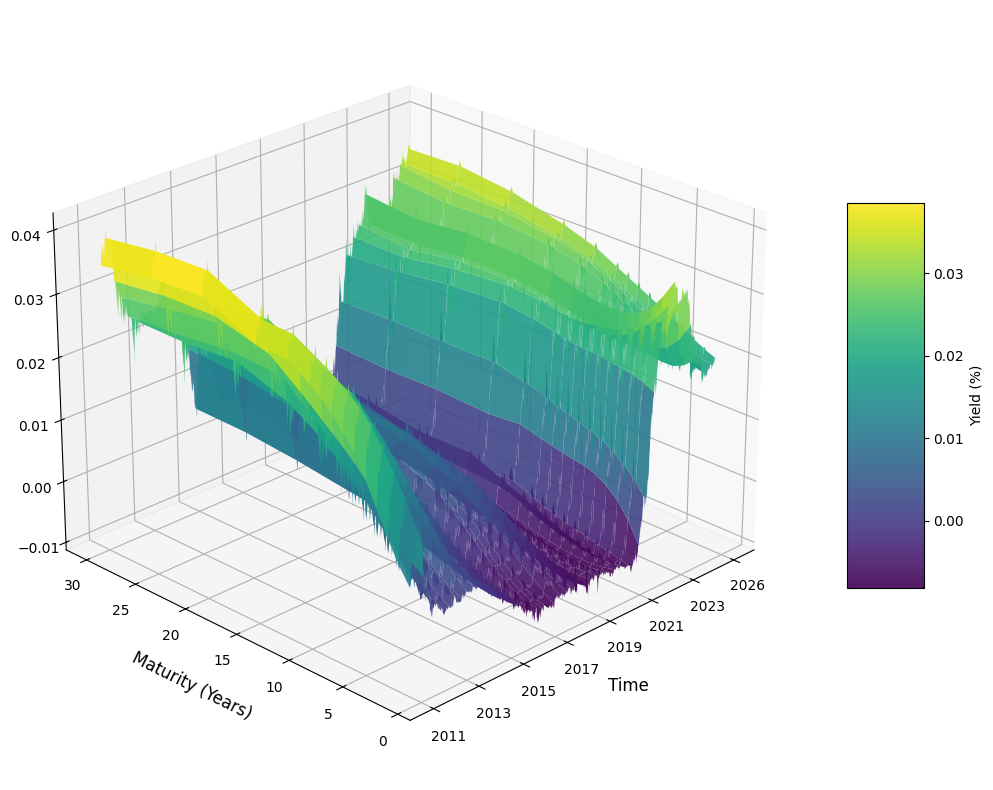


✓ 3D yield curve plot displayed for Germany (DE)


In [21]:
# ============================================
# IMPORT YIELD CURVE DATA AND ANALYSIS
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import os

# ============================================
# 1. IMPORT DATA
# ============================================

# Define filepath as variable
filepath = r"\\GIMECB01\HOMEDIR-VZ$\westenb\Thesis\Data"
filename = "DE_YieldCurve.csv"
full_path = os.path.join(filepath, filename)

# Import CSV
df = pd.read_csv(full_path)
df['REFERENCE_DATE'] = pd.to_datetime(df['REFERENCE_DATE'])

print("="*80)
print("YIELD CURVE DATA IMPORTED: GERMANY (DE)")
print("="*80)
print(f"File: {filename}")
print(f"Rows: {len(df)}")
print(f"Date range: {df['REFERENCE_DATE'].min().date()} to {df['REFERENCE_DATE'].max().date()}")
print()

# ============================================
# 2. SUMMARY STATISTICS (ACADEMIC FORMAT)
# ============================================

# Define zero yield columns
zero_columns = ['ZERO_1Y', 'ZERO_2Y', 'ZERO_3Y', 'ZERO_4Y', 'ZERO_5Y', 
                'ZERO_6Y', 'ZERO_7Y', 'ZERO_8Y', 'ZERO_9Y', 'ZERO_10Y',
                'ZERO_12Y', 'ZERO_15Y', 'ZERO_20Y', 'ZERO_25Y', 'ZERO_30Y']

# Calculate statistics
stats_df = pd.DataFrame({
    'Mean': df[zero_columns].mean(),
    'Std': df[zero_columns].std(),
    'Min': df[zero_columns].min(),
    'Q25': df[zero_columns].quantile(0.25),
    'Median': df[zero_columns].median(),
    'Q75': df[zero_columns].quantile(0.75),
    'Max': df[zero_columns].max(),
    'N': df[zero_columns].count()
})

print("="*80)
print("TABLE: SUMMARY STATISTICS OF ZERO-COUPON YIELD CURVES")
print("="*80)
print("Market: Germany (DE)")
print(f"Sample period: {df['REFERENCE_DATE'].min().date()} to {df['REFERENCE_DATE'].max().date()}")
print(f"Observations: {len(df)}")
print()
print("All values in percentage points (%)")
print("-"*80)
print(stats_df.round(3).to_string())
print("="*80)
print()

# Additional statistics
print("ADDITIONAL STATISTICS")
print("-"*80)
print(f"Time series length: {len(df)} observations")
print(f"Total observation period: {(df['REFERENCE_DATE'].max() - df['REFERENCE_DATE'].min()).days} days")
print(f"Average observation frequency: {(df['REFERENCE_DATE'].max() - df['REFERENCE_DATE'].min()).days / len(df):.2f} days")
print()

# ============================================
# 3. 3D YIELD CURVE PLOT
# ============================================

# Prepare data for 3D plot
dates = df['REFERENCE_DATE'].values
maturities = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30]  # in years

# Create meshgrid
date_nums = np.arange(len(dates))
X, Y = np.meshgrid(date_nums, maturities)

# Create Z matrix (yields)
Z = df[zero_columns].T.values

# Create 3D plot
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surf = ax.plot_surface(X, Y, Z, cmap=cm.viridis, 
                       linewidth=0, antialiased=True, alpha=0.9)

# Labels
ax.set_xlabel('Time', fontsize=12, labelpad=10)
ax.set_ylabel('Maturity (Years)', fontsize=12, labelpad=10)
ax.set_zlabel('Zero Yield (%)', fontsize=12, labelpad=10)

# Set x-axis ticks to show only years
num_ticks = 8
tick_positions = np.linspace(0, len(dates)-1, num_ticks, dtype=int)
ax.set_xticks(tick_positions)
ax.set_xticklabels([pd.Timestamp(dates[i]).year for i in tick_positions], 
                    rotation=0, ha='center', fontsize=10)

# Colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Yield (%)')

# Adjust viewing angle for better perspective
ax.view_init(elev=25, azim=225)

plt.tight_layout()
plt.show()

print("\n✓ 3D yield curve plot displayed for Germany (DE)")

# PCA fitting for training purpouses

In [23]:
# ============================================
# CREATE PCA TRAINING MATRIX FOR ANN
# Using fixed lookback with future forecasts
# ============================================

from sklearn.decomposition import PCA

print("="*80)
print("CREATING PCA TRAINING MATRIX (df_pca)")
print("="*80)

# ============================================
# PARAMETERS
# ============================================

lookback = 756  # 3 years * 252 trading days
future = 21     # ~1 month in trading days
n_factors = 4   # Number of principal components

print(f"\nParameters:")
print(f"  Lookback window: {lookback} trading days ({lookback/252:.2f} years)")
print(f"  Forecast horizon: {future} trading days (~1 month)")
print(f"  Number of factors: {n_factors}")

# ============================================
# INITIALIZE STORAGE
# ============================================

# Column names for loadings (15 maturities × n_factors PCs)
maturity_names = ['1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y', 
                  '12Y', '15Y', '20Y', '25Y', '30Y']
loading_columns = []
for mat in maturity_names:
    for pc in range(1, n_factors + 1):
        loading_columns.append(f'L_{mat}_PC{pc}')

# Factor column names
current_factor_cols = [f'CURRENT_PC{i}' for i in range(1, n_factors + 1)]
future_factor_cols = [f'FUTURE_PC{i}' for i in range(1, n_factors + 1)]

# All column names
columns = (
    ['CURRENT_DATE', 'FORECASTED_DATE'] +
    loading_columns +
    current_factor_cols + ['MSE_CURRENT'] +
    future_factor_cols + ['MSE_FUTURE']
)

# Initialize list to store rows
data_rows = []

print(f"\nTotal columns in df_pca: {len(columns)}")
print(f"  - 2 date columns")
print(f"  - {len(loading_columns)} loading columns (15 maturities × {n_factors} PCs)")
print(f"  - {n_factors + 1} current state columns ({n_factors} factors + MSE)")
print(f"  - {n_factors + 1} future state columns ({n_factors} factors + MSE)")

# ============================================
# GENERATE TRAINING MATRIX
# ============================================

print(f"\n{'='*80}")
print("GENERATING OBSERVATIONS...")
print("="*80)

# Starting index: need lookback history
start_idx = lookback

# Ending index: need future data available
end_idx = len(df) - future

n_observations = end_idx - start_idx

print(f"\nProcessing {n_observations} observations...")
print(f"  Start index: {start_idx} (date: {df.iloc[start_idx]['REFERENCE_DATE'].date()})")
print(f"  End index: {end_idx} (date: {df.iloc[end_idx]['REFERENCE_DATE'].date()})")
print(f"  Last forecast date: {df.iloc[end_idx + future - 1]['REFERENCE_DATE'].date()}")

# Progress tracking
progress_interval = max(1, n_observations // 10)

for i in range(start_idx, end_idx):
    # Progress indicator
    if (i - start_idx) % progress_interval == 0:
        progress = ((i - start_idx) / n_observations) * 100
        print(f"  Progress: {progress:.0f}% (observation {i-start_idx+1}/{n_observations})")
    
    # ============================================
    # 1. DEFINE DATES
    # ============================================
    
    current_idx = i
    future_idx = i + future
    
    current_date = df.iloc[current_idx]['REFERENCE_DATE']
    forecasted_date = df.iloc[future_idx]['REFERENCE_DATE']
    
    # ============================================
    # 2. ESTIMATE PCA ON LOOKBACK WINDOW
    # ============================================
    
    # Window: [current_idx - lookback : current_idx]
    window_start = current_idx - lookback
    window_end = current_idx
    
    Y_window = df.iloc[window_start:window_end][zero_columns].values
    
    # Fit PCA
    pca = PCA(n_components=n_factors)
    pca.fit(Y_window)
    
    # Get loadings (15 × n_factors matrix)
    loadings = pca.components_.T  # Transpose to get (15 × n_factors)
    
    # Flatten loadings for storage (row-major order)
    loadings_flat = loadings.flatten()  # 15 * n_factors values
    
    # ============================================
    # 3. CURRENT STATE (using current loadings)
    # ============================================
    
    # Get current yield curve
    y_current = df.iloc[current_idx][zero_columns].values.reshape(1, -1)  # (1 × 15)
    
    # Calculate current factors: f = y @ L
    factors_current = y_current @ loadings  # (1 × n_factors)
    factors_current = factors_current.flatten()
    
    # Reconstruct current yield curve
    y_current_reconstructed = factors_current @ loadings.T  # (1 × 15)
    
    # Calculate MSE
    mse_current = np.mean((y_current.flatten() - y_current_reconstructed)**2)
    
    # ============================================
    # 4. FUTURE STATE (using SAME loadings)
    # ============================================
    
    # Get future yield curve
    y_future = df.iloc[future_idx][zero_columns].values.reshape(1, -1)  # (1 × 15)
    
    # Calculate future factors using CURRENT loadings: f = y @ L_current
    factors_future = y_future @ loadings  # (1 × n_factors)
    factors_future = factors_future.flatten()
    
    # Reconstruct future yield curve using CURRENT loadings
    y_future_reconstructed = factors_future @ loadings.T  # (1 × 15)
    
    # Calculate MSE (this tests L_t ≈ L_t+1 assumption)
    mse_future = np.mean((y_future.flatten() - y_future_reconstructed)**2)
    
    # ============================================
    # 5. STORE ROW
    # ============================================
    
    row = [
        current_date,
        forecasted_date,
        *loadings_flat,  # 15 * n_factors loading values
        *factors_current,  # n_factors current factor values
        mse_current,
        *factors_future,  # n_factors future factor values
        mse_future
    ]
    
    data_rows.append(row)

# ============================================
# CREATE DATAFRAME
# ============================================

print(f"\n{'='*80}")
print("CREATING DATAFRAME...")
print("="*80)

df_pca = pd.DataFrame(data_rows, columns=columns)

print(f"\n✓ df_pca created successfully!")
print(f"  Shape: {df_pca.shape}")
print(f"  Columns: {len(df_pca.columns)}")
print(f"  Rows: {len(df_pca)}")

# ============================================
# SUMMARY STATISTICS
# ============================================

print(f"\n{'='*80}")
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nDate Range:")
print(f"  First current date: {df_pca['CURRENT_DATE'].min().date()}")
print(f"  Last current date: {df_pca['CURRENT_DATE'].max().date()}")
print(f"  First forecast date: {df_pca['FORECASTED_DATE'].min().date()}")
print(f"  Last forecast date: {df_pca['FORECASTED_DATE'].max().date()}")

print(f"\nFactor Statistics (Current):")
factor_stats_current = df_pca[current_factor_cols].describe()
print(factor_stats_current.round(4))

print(f"\nFactor Statistics (Future):")
factor_stats_future = df_pca[future_factor_cols].describe()
print(factor_stats_future.round(4))

print(f"\nMSE Statistics:")
mse_stats = df_pca[['MSE_CURRENT', 'MSE_FUTURE']].describe()
print(mse_stats)

print(f"\nMSE Comparison:")
print(f"  Mean MSE (Current): {df_pca['MSE_CURRENT'].mean():.8f}")
print(f"  Mean MSE (Future): {df_pca['MSE_FUTURE'].mean():.8f}")
print(f"  Ratio (Future/Current): {df_pca['MSE_FUTURE'].mean() / df_pca['MSE_CURRENT'].mean():.4f}")
print(f"  Median MSE (Current): {df_pca['MSE_CURRENT'].median():.8f}")
print(f"  Median MSE (Future): {df_pca['MSE_FUTURE'].median():.8f}")

print(f"\n{'='*80}")
print("TESTING L_t ≈ L_t+1 ASSUMPTION")
print("="*80)

# Calculate MSE ratio for each observation
df_pca['MSE_RATIO'] = df_pca['MSE_FUTURE'] / df_pca['MSE_CURRENT']

print(f"\nMSE Ratio (Future/Current) Statistics:")
print(f"  Mean: {df_pca['MSE_RATIO'].mean():.4f}")
print(f"  Median: {df_pca['MSE_RATIO'].median():.4f}")
print(f"  Std Dev: {df_pca['MSE_RATIO'].std():.4f}")
print(f"  Min: {df_pca['MSE_RATIO'].min():.4f}")
print(f"  Max: {df_pca['MSE_RATIO'].max():.4f}")

# Interpretation
mean_ratio = df_pca['MSE_RATIO'].mean()
if mean_ratio < 1.1:
    print(f"\n✓✓✓ EXCELLENT: MSE ratio = {mean_ratio:.3f}")
    print(f"    → Using 'stale' loadings increases error by only {(mean_ratio-1)*100:.1f}%")
    print(f"    → L_t ≈ L_t+1 assumption is VALID!")
elif mean_ratio < 1.5:
    print(f"\n✓ ACCEPTABLE: MSE ratio = {mean_ratio:.3f}")
    print(f"    → Using 'stale' loadings increases error by {(mean_ratio-1)*100:.1f}%")
    print(f"    → L_t ≈ L_t+1 assumption is reasonable")
else:
    print(f"\n✗ CONCERNING: MSE ratio = {mean_ratio:.3f}")
    print(f"    → Using 'stale' loadings increases error by {(mean_ratio-1)*100:.1f}%")
    print(f"    → L_t ≈ L_t+1 assumption may be questionable")

print(f"\n{'='*80}")
print("df_pca READY FOR ANN TRAINING")
print("="*80)

# Display first few rows
print(f"\nFirst 5 rows (selected columns):")
display_cols = ['CURRENT_DATE', 'FORECASTED_DATE'] + current_factor_cols + ['MSE_CURRENT'] + future_factor_cols + ['MSE_FUTURE', 'MSE_RATIO']
print(df_pca[display_cols].head())

print(f"\n✓ Matrix generation complete!")

CREATING PCA TRAINING MATRIX (df_pca)

Parameters:
  Lookback window: 756 trading days (3.00 years)
  Forecast horizon: 21 trading days (~1 month)
  Number of factors: 4

Total columns in df_pca: 72
  - 2 date columns
  - 60 loading columns (15 maturities × 4 PCs)
  - 5 current state columns (4 factors + MSE)
  - 5 future state columns (4 factors + MSE)

GENERATING OBSERVATIONS...

Processing 3051 observations...
  Start index: 756 (date: 2013-12-18)
  End index: 3807 (date: 2025-12-18)
  Last forecast date: 2026-01-15
  Progress: 0% (observation 1/3051)
  Progress: 10% (observation 306/3051)
  Progress: 20% (observation 611/3051)
  Progress: 30% (observation 916/3051)
  Progress: 40% (observation 1221/3051)
  Progress: 50% (observation 1526/3051)
  Progress: 60% (observation 1831/3051)
  Progress: 70% (observation 2136/3051)
  Progress: 80% (observation 2441/3051)
  Progress: 90% (observation 2746/3051)
  Progress: 100% (observation 3051/3051)

CREATING DATAFRAME...

✓ df_pca created 

## Showing PCA future fits of the yield curve

In [24]:
# ============================================
# YIELD CURVE RECONSTRUCTION & VISUALIZATION
# Block 3: Create df_forecastyields and plotting function
# ============================================

print("="*80)
print("CREATING FORECASTED YIELDS DATAFRAME")
print("="*80)

# ============================================
# DETECT NUMBER OF FACTORS FROM df_pca
# ============================================

# Infer n_factors from df_pca columns (count FUTURE_PC columns)
future_factor_cols = [col for col in df_pca.columns if col.startswith('FUTURE_PC')]
n_factors_detected = len(future_factor_cols)

print(f"\nDetected {n_factors_detected} factors from df_pca")

# ============================================
# 1. RECONSTRUCT YIELDS FROM FUTURE FACTORS
# ============================================

print("\nReconstructing yield curves from future factors...")

# Initialize storage
forecasted_yields_data = []

# Maturity names for column creation
maturity_names = ['1Y', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y', 
                  '12Y', '15Y', '20Y', '25Y', '30Y']

# Process each observation in df_pca
for idx in range(len(df_pca)):
    # Get future factors (dynamically based on n_factors)
    future_factors = df_pca.iloc[idx][future_factor_cols].values
    
    # Extract loadings (15 maturities × n_factors PCs)
    # Stored in row-major order: L_1Y_PC1, L_1Y_PC2, ..., L_1Y_PCn, L_2Y_PC1, ...
    loading_columns = [col for col in df_pca.columns if col.startswith('L_')]
    loadings_flat = df_pca.iloc[idx][loading_columns].values
    
    # Reshape loadings back to (15 × n_factors) matrix
    loadings = loadings_flat.reshape(15, n_factors_detected)
    
    # Reconstruct yields: y = f @ L.T
    reconstructed_yields = future_factors @ loadings.T  # (n_factors,) @ (n_factors, 15) = (15,)
    
    # Store results
    row = [df_pca.iloc[idx]['FORECASTED_DATE']] + list(reconstructed_yields) + [df_pca.iloc[idx]['MSE_RATIO']]
    forecasted_yields_data.append(row)

# Create dataframe
forecast_columns = ['FORECASTED_DATE'] + [f'FORECAST_{mat}' for mat in maturity_names] + ['MSE_RATIO']
df_forecastyields = pd.DataFrame(forecasted_yields_data, columns=forecast_columns)

print(f"\n✓ df_forecastyields created successfully!")
print(f"  Shape: {df_forecastyields.shape}")
print(f"  Columns: {len(df_forecastyields.columns)}")
print(f"  Rows: {len(df_forecastyields)}")

print(f"\nFirst 5 rows:")
print(df_forecastyields.head())

# ============================================
# 2. CALCULATE TOTAL ABSOLUTE ERROR
# ============================================

print("\nCalculating Total Absolute Error (TAE) for each observation...")

tae_list = []

for idx in range(len(df_forecastyields)):
    forecasted_date = df_forecastyields.iloc[idx]['FORECASTED_DATE']
    
    # Get reconstructed yields
    forecast_cols = [f'FORECAST_{mat}' for mat in maturity_names]
    reconstructed_yields = df_forecastyields.iloc[idx][forecast_cols].values
    
    # Get actual yields from df
    actual_row = df[df['REFERENCE_DATE'] == forecasted_date]
    
    if len(actual_row) > 0:
        actual_yields = actual_row[zero_columns].values.flatten()
        
        # Calculate total absolute error (sum across all maturities)
        tae = np.sum(np.abs(actual_yields - reconstructed_yields))
        tae_list.append(tae)
    else:
        tae_list.append(np.nan)

df_forecastyields['TAE'] = tae_list

print(f"✓ Total Absolute Error calculated")

# ============================================
# 3. SUMMARY TABLES - INTERESTING DATES
# ============================================

print("\n" + "="*80)
print("INTERESTING DATES FOR ANALYSIS")
print("="*80)

# Top 5 Highest MSE Ratios (Worst Fits)
print("\nTOP 5 WORST FITS (Highest MSE Ratio):")
print("-"*80)
worst_fits = df_forecastyields.nlargest(5, 'MSE_RATIO')[['FORECASTED_DATE', 'MSE_RATIO']]
print(worst_fits.to_string(index=False))

# Top 5 Lowest MSE Ratios (Best Fits)
print("\n\nTOP 5 BEST FITS (Lowest MSE Ratio):")
print("-"*80)
best_fits = df_forecastyields.nsmallest(5, 'MSE_RATIO')[['FORECASTED_DATE', 'MSE_RATIO']]
print(best_fits.to_string(index=False))

# Top 5 Closest to 1.0 (Most Average/Representative)
print("\n\nTOP 5 CLOSEST TO PERFECT (MSE Ratio ≈ 1.0):")
print("-"*80)
df_forecastyields['MSE_RATIO_DIFF'] = abs(df_forecastyields['MSE_RATIO'] - 1.0)
closest_to_one = df_forecastyields.nsmallest(5, 'MSE_RATIO_DIFF')[['FORECASTED_DATE', 'MSE_RATIO']]
print(closest_to_one.to_string(index=False))

# Top 5 Highest Total Absolute Error
print("\n\nTOP 5 HIGHEST TOTAL ABSOLUTE ERROR (Summed Across All Maturities):")
print("-"*80)
highest_tae = df_forecastyields.nlargest(5, 'TAE')[['FORECASTED_DATE', 'TAE', 'MSE_RATIO']]
print(highest_tae.to_string(index=False))

# ============================================
# 4. PLOTTING FUNCTION (LATEX-READY)
# ============================================

def plot_yield_curve_fit(forecasted_date, figsize=(10, 6)):
    """
    Plot actual vs reconstructed yield curve for a given forecasted date
    LaTeX-ready version: minimal styling, no titles/legends
    
    Parameters:
    -----------
    forecasted_date : str or pd.Timestamp
        The forecasted date to plot (format: 'YYYY-MM-DD' or datetime)
    figsize : tuple
        Figure size (width, height)
    """
    # Convert to timestamp if string
    if isinstance(forecasted_date, str):
        forecasted_date = pd.to_datetime(forecasted_date)
    
    # Find row in df_forecastyields
    forecast_row = df_forecastyields[df_forecastyields['FORECASTED_DATE'] == forecasted_date]
    
    if len(forecast_row) == 0:
        print(f"Error: Date {forecasted_date.date()} not found in df_forecastyields")
        print(f"Available date range: {df_forecastyields['FORECASTED_DATE'].min().date()} to {df_forecastyields['FORECASTED_DATE'].max().date()}")
        return
    
    forecast_row = forecast_row.iloc[0]
    
    # Get reconstructed yields
    forecast_cols = [f'FORECAST_{mat}' for mat in maturity_names]
    reconstructed_yields = forecast_row[forecast_cols].values
    
    # Get actual yields from df
    actual_row = df[df['REFERENCE_DATE'] == forecasted_date]
    
    if len(actual_row) == 0:
        print(f"Error: Date {forecasted_date.date()} not found in original df")
        return
    
    actual_yields = actual_row[zero_columns].values.flatten()
    
    # Get MSE ratio and TAE
    mse_ratio = forecast_row['MSE_RATIO']
    tae = forecast_row['TAE']
    
    # Calculate absolute errors
    errors = actual_yields - reconstructed_yields
    mae = np.mean(np.abs(errors))
    max_error = np.max(np.abs(errors))
    
    # Maturities for x-axis
    maturities = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30]
    
    # Create plot
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    
    # Light blue color
    light_blue = 'lightblue'
    
    # Plot actual yields (crosses)
    ax.plot(maturities, actual_yields * 100, 'x', markersize=10, 
            markeredgewidth=2, color=light_blue)
    
    # Plot reconstructed yields (line)
    ax.plot(maturities, reconstructed_yields * 100, '-', linewidth=2,
            color=light_blue)
    
    ax.set_xlabel('Maturity (Years)')
    ax.set_ylabel('Yield (%)')
    ax.set_xticks(maturities)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\nFit Summary for {forecasted_date.date()}:")
    print(f"  Number of factors used: {n_factors_detected}")
    print(f"  MSE Ratio: {mse_ratio:.4f}")
    print(f"  Total Absolute Error: {tae*100:.4f} bp")
    print(f"  Mean Absolute Error: {mae*100:.4f} bp")
    print(f"  Max Absolute Error: {max_error*100:.4f} bp")
    print(f"  RMSE: {np.sqrt(np.mean(errors**2))*100:.4f} bp")

print("\n" + "="*80)
print("PLOTTING FUNCTION DEFINED")
print("="*80)
print("\nUsage: plot_yield_curve_fit('YYYY-MM-DD')")
print("\nExample dates to try:")
print(f"  Worst fit (MSE): plot_yield_curve_fit('{worst_fits.iloc[0]['FORECASTED_DATE'].date()}')")
print(f"  Best fit (MSE):  plot_yield_curve_fit('{best_fits.iloc[0]['FORECASTED_DATE'].date()}')")
print(f"  Average (MSE):   plot_yield_curve_fit('{closest_to_one.iloc[0]['FORECASTED_DATE'].date()}')")
print(f"  Worst fit (TAE): plot_yield_curve_fit('{highest_tae.iloc[0]['FORECASTED_DATE'].date()}')")

print("\n✓ Block 3 complete - df_forecastyields ready and plotting function available!")

CREATING FORECASTED YIELDS DATAFRAME

Detected 4 factors from df_pca

Reconstructing yield curves from future factors...

✓ df_forecastyields created successfully!
  Shape: (3051, 17)
  Columns: 17
  Rows: 3051

First 5 rows:
  FORECASTED_DATE  FORECAST_1Y  FORECAST_2Y  FORECAST_3Y  FORECAST_4Y  \
0      2014-01-23     0.001772     0.001793     0.003425     0.005976   
1      2014-01-24     0.001541     0.001443     0.002942     0.005366   
2      2014-01-27     0.001535     0.001459     0.002963     0.005384   
3      2014-01-28     0.001554     0.001533     0.003083     0.005541   
4      2014-01-29     0.001436     0.001422     0.002972     0.005433   

   FORECAST_5Y  FORECAST_6Y  FORECAST_7Y  FORECAST_8Y  FORECAST_9Y  \
0     0.008091     0.009819     0.011758     0.013836     0.015877   
1     0.007379     0.009037     0.010932     0.012987     0.015015   
2     0.007390     0.009041     0.010931     0.012986     0.015014   
3     0.007575     0.009244     0.011142     0.013199  

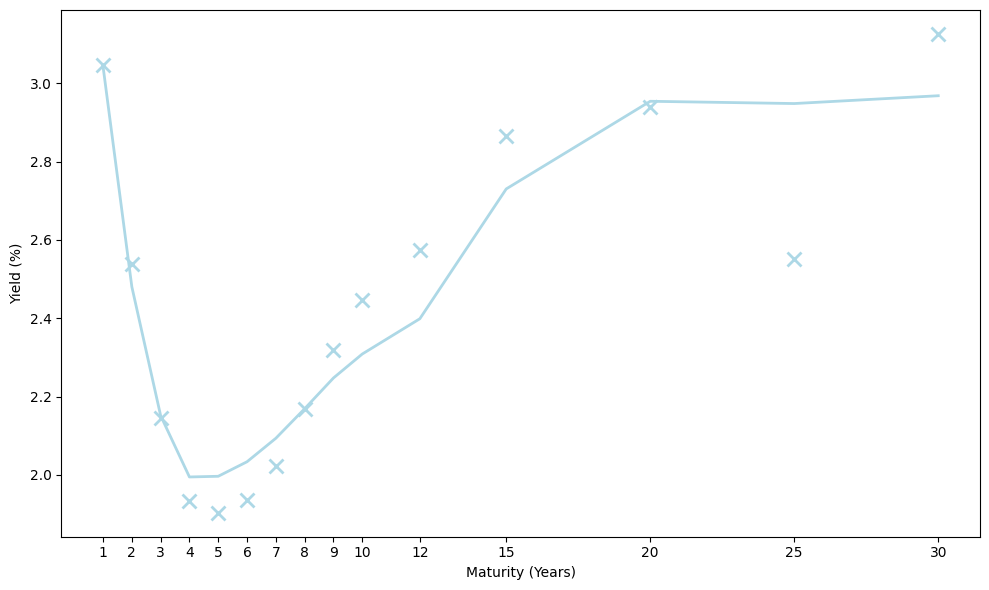


Fit Summary for 2024-06-24:
  MSE Ratio: 17.0261
  Total Absolute Error: 1.4816 bp
  Mean Absolute Error: 0.0988 bp
  Max Absolute Error: 0.3976 bp
  RMSE: 0.1381 bp


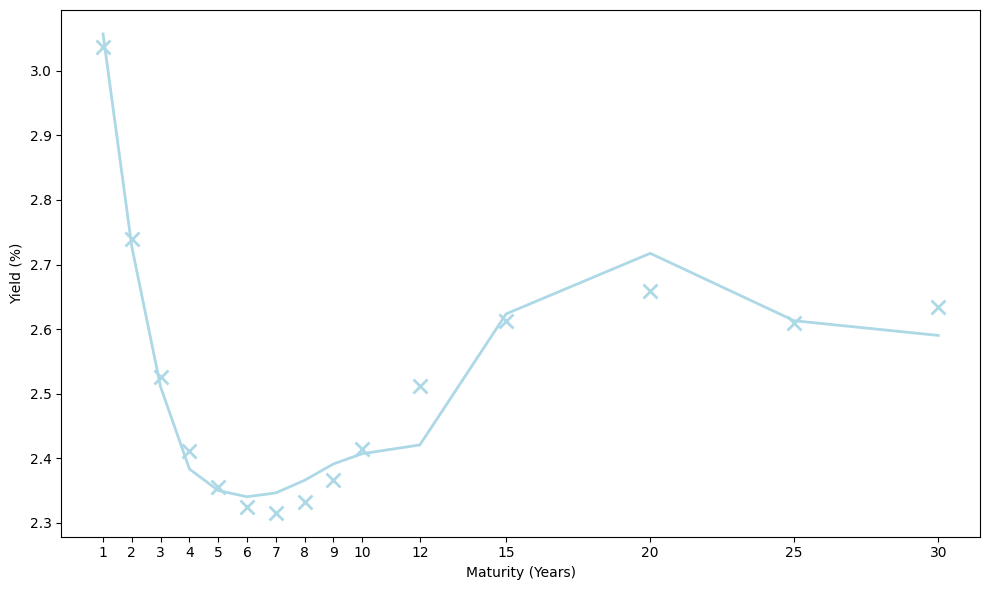


Fit Summary for 2024-07-23:
  MSE Ratio: 0.0628
  Total Absolute Error: 0.3996 bp
  Mean Absolute Error: 0.0266 bp
  Max Absolute Error: 0.0906 bp
  RMSE: 0.0349 bp


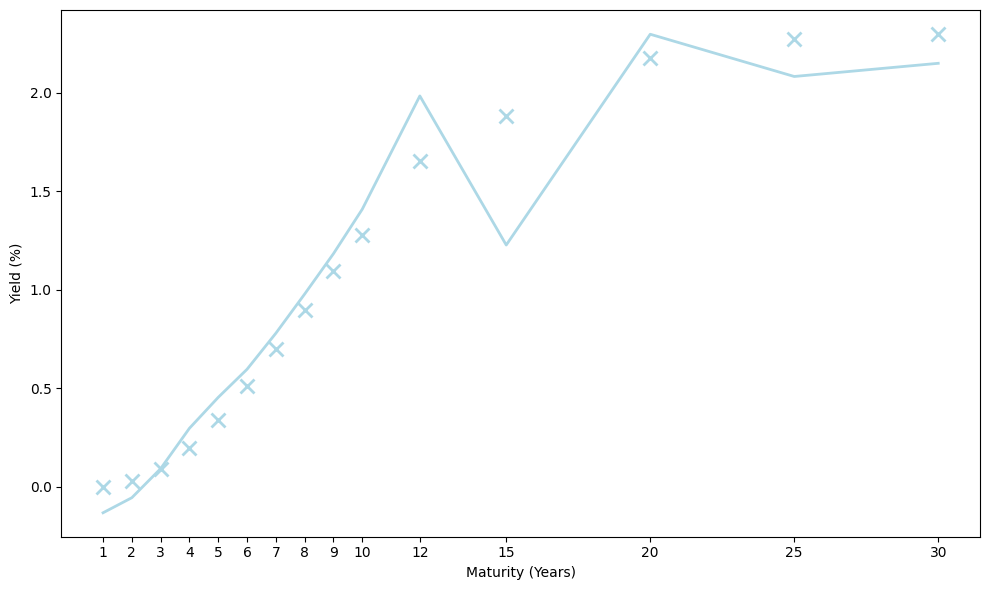


Fit Summary for 2014-07-08:
  MSE Ratio: 0.9919
  Total Absolute Error: 2.3460 bp
  Mean Absolute Error: 0.1564 bp
  Max Absolute Error: 0.6555 bp
  RMSE: 0.2167 bp


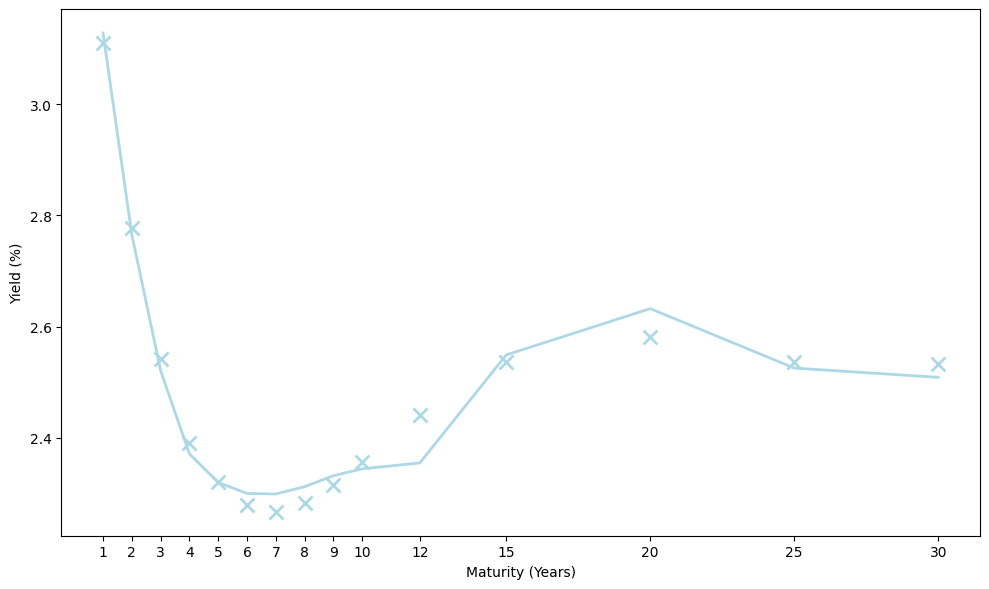


Fit Summary for 2024-06-14:
  MSE Ratio: 1.0001
  Total Absolute Error: 0.3684 bp
  Mean Absolute Error: 0.0246 bp
  Max Absolute Error: 0.0866 bp
  RMSE: 0.0317 bp


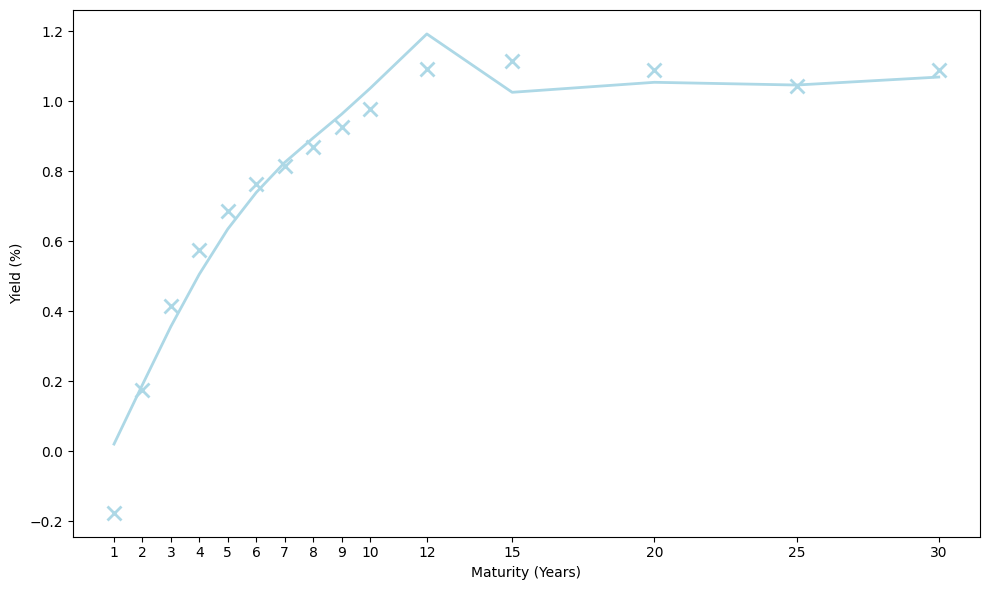


Fit Summary for 2022-05-05:
  MSE Ratio: 0.3894
  Total Absolute Error: 0.7910 bp
  Mean Absolute Error: 0.0527 bp
  Max Absolute Error: 0.1963 bp
  RMSE: 0.0707 bp


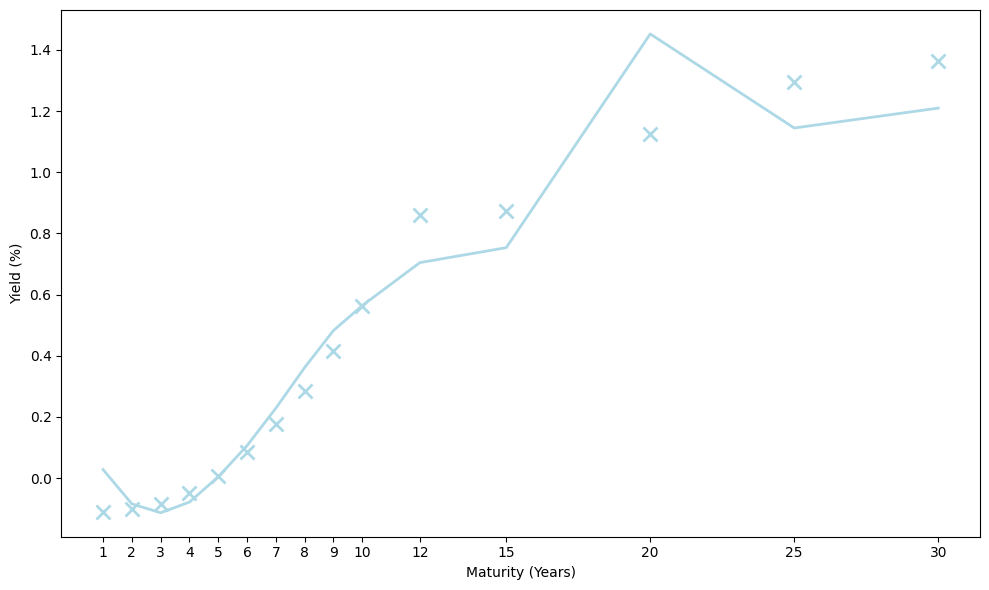


Fit Summary for 2015-01-05:
  MSE Ratio: 0.8952
  Total Absolute Error: 1.3477 bp
  Mean Absolute Error: 0.0898 bp
  Max Absolute Error: 0.3273 bp
  RMSE: 0.1230 bp


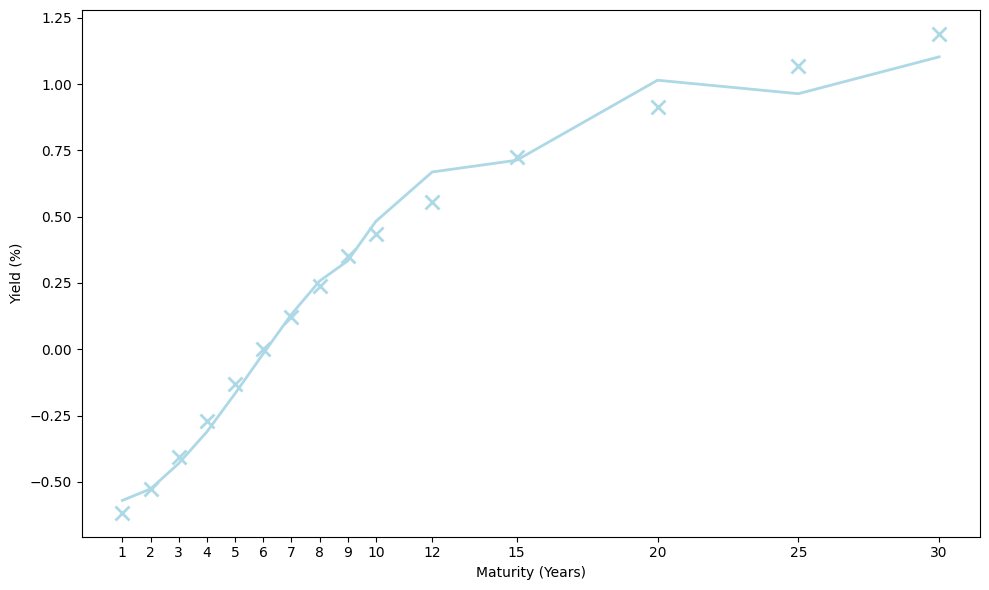


Fit Summary for 2018-09-20:
  MSE Ratio: 1.2437
  Total Absolute Error: 0.6773 bp
  Mean Absolute Error: 0.0452 bp
  Max Absolute Error: 0.1136 bp
  RMSE: 0.0582 bp


In [19]:
plot_yield_curve_fit('2024-06-24')
plot_yield_curve_fit('2024-07-23')
plot_yield_curve_fit('2014-07-08')
plot_yield_curve_fit('2024-06-14')
plot_yield_curve_fit('2022-05-05')
plot_yield_curve_fit('2015-01-05')
plot_yield_curve_fit('2018-09-20')

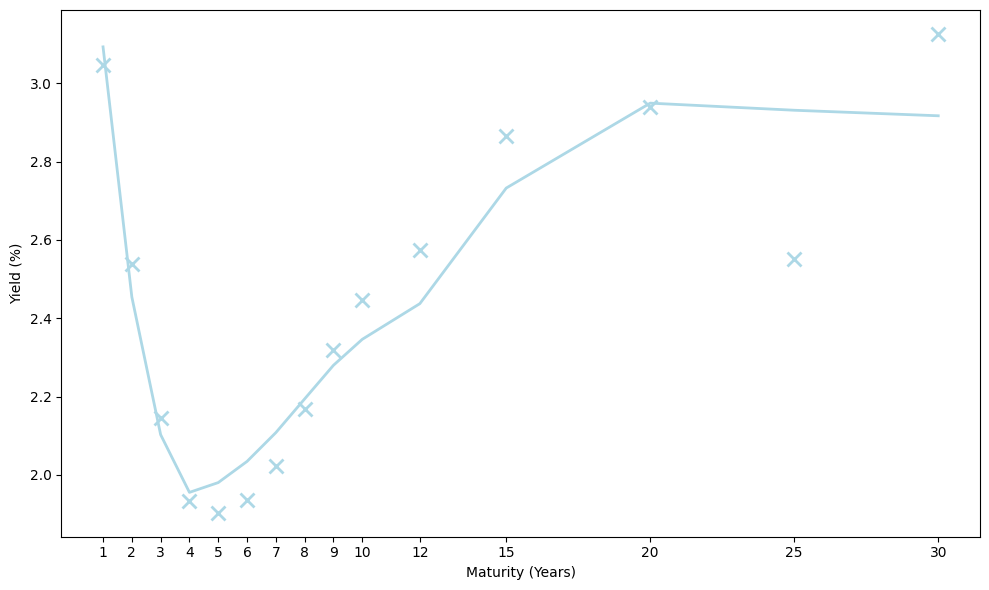


Fit Summary for 2024-06-24:
  Number of factors used: 4
  MSE Ratio: 18.9431
  Total Absolute Error: 1.4901 bp
  Mean Absolute Error: 0.0993 bp
  Max Absolute Error: 0.3805 bp
  RMSE: 0.1345 bp


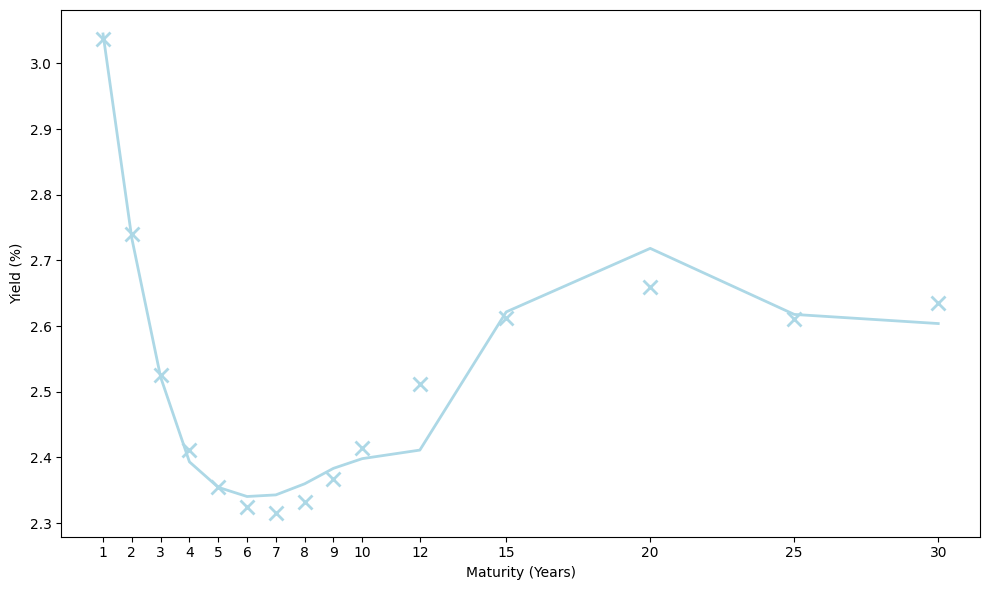


Fit Summary for 2024-07-23:
  Number of factors used: 4
  MSE Ratio: 0.0630
  Total Absolute Error: 0.3462 bp
  Mean Absolute Error: 0.0231 bp
  Max Absolute Error: 0.1002 bp
  RMSE: 0.0340 bp


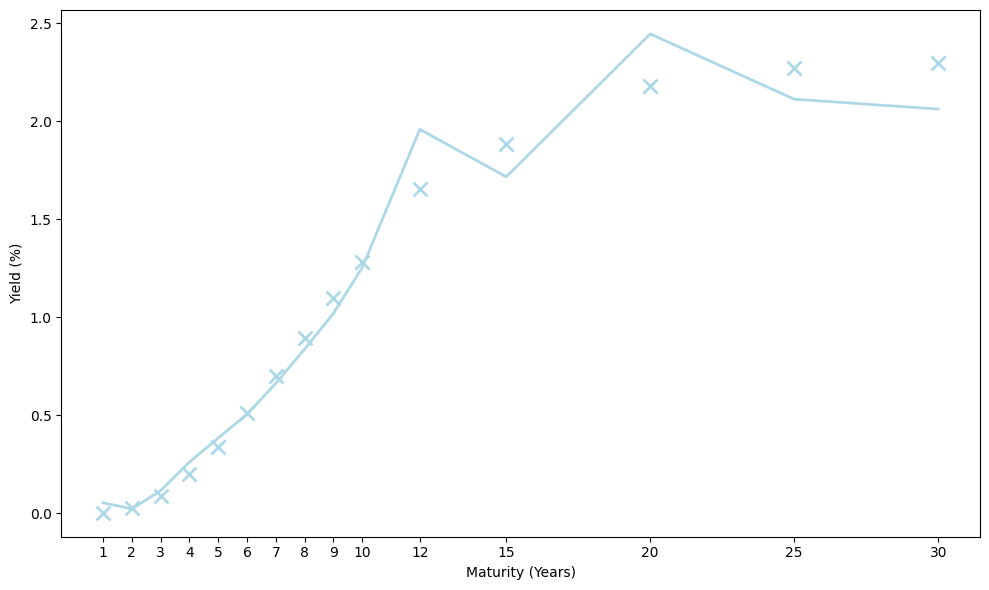


Fit Summary for 2014-07-08:
  Number of factors used: 4
  MSE Ratio: 1.2792
  Total Absolute Error: 1.5280 bp
  Mean Absolute Error: 0.1019 bp
  Max Absolute Error: 0.3059 bp
  RMSE: 0.1400 bp


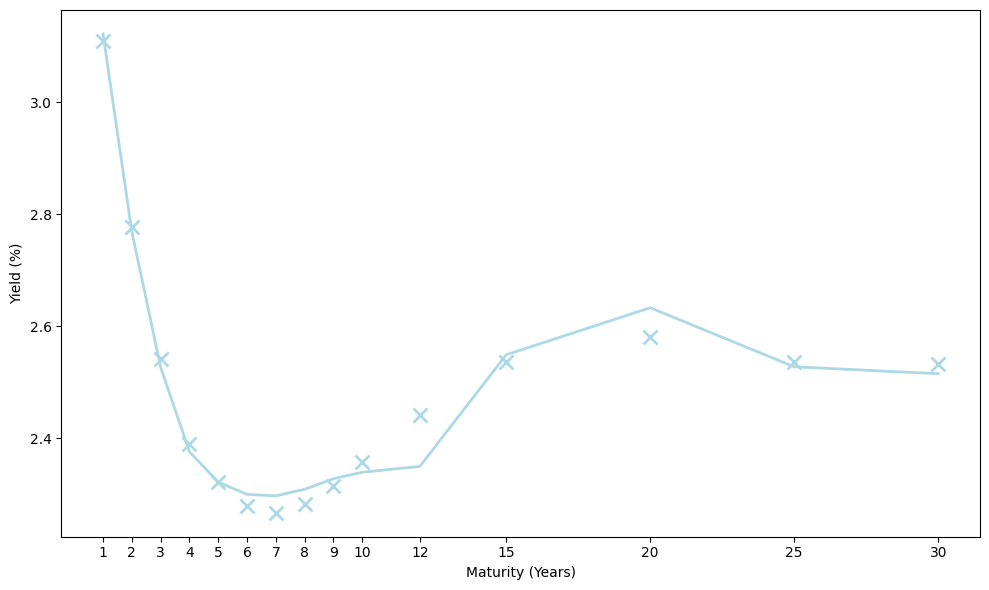


Fit Summary for 2024-06-14:
  Number of factors used: 4
  MSE Ratio: 1.1093
  Total Absolute Error: 0.3389 bp
  Mean Absolute Error: 0.0226 bp
  Max Absolute Error: 0.0917 bp
  RMSE: 0.0314 bp


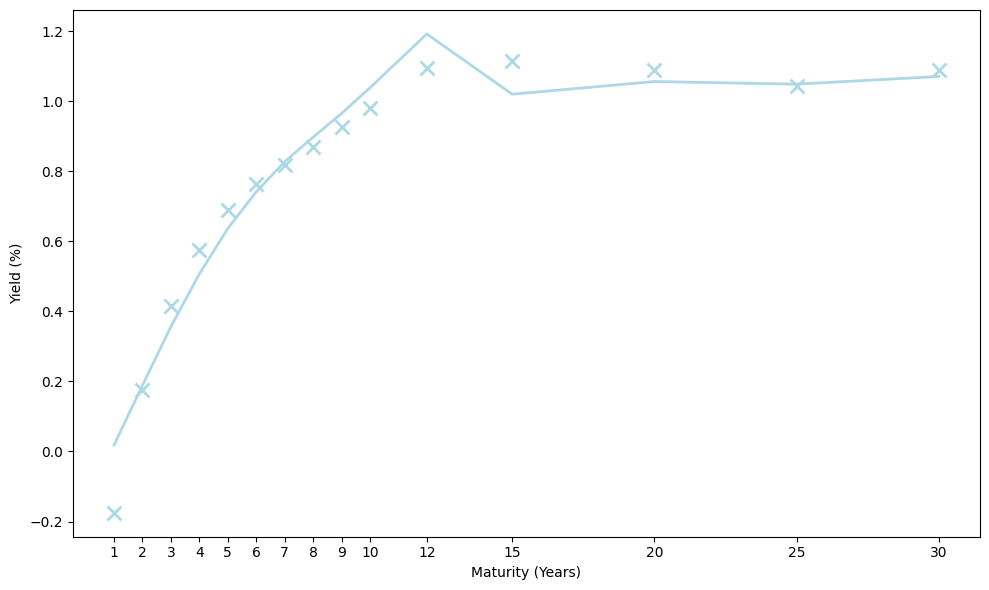


Fit Summary for 2022-05-05:
  Number of factors used: 4
  MSE Ratio: 0.5585
  Total Absolute Error: 0.7951 bp
  Mean Absolute Error: 0.0530 bp
  Max Absolute Error: 0.1933 bp
  RMSE: 0.0707 bp


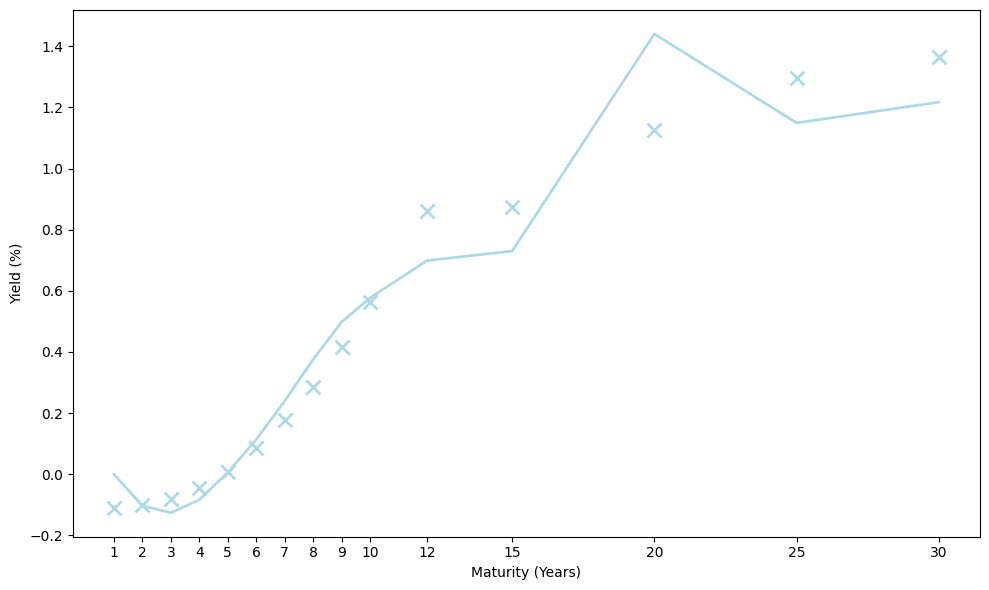


Fit Summary for 2015-01-05:
  Number of factors used: 4
  MSE Ratio: 0.8842
  Total Absolute Error: 1.3855 bp
  Mean Absolute Error: 0.0924 bp
  Max Absolute Error: 0.3155 bp
  RMSE: 0.1222 bp


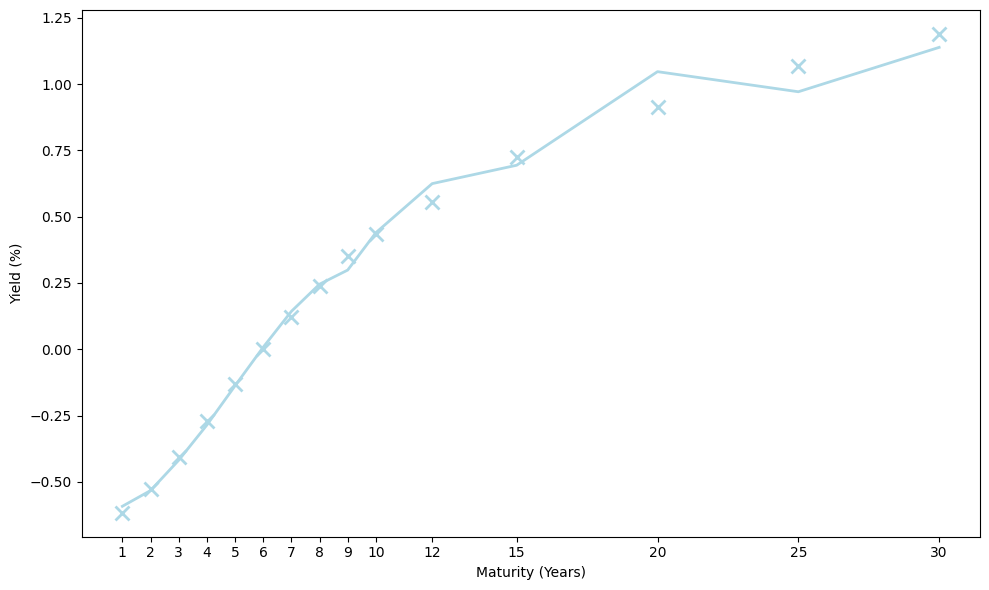


Fit Summary for 2018-09-20:
  Number of factors used: 4
  MSE Ratio: 1.2002
  Total Absolute Error: 0.5367 bp
  Mean Absolute Error: 0.0358 bp
  Max Absolute Error: 0.1337 bp
  RMSE: 0.0517 bp


In [25]:
plot_yield_curve_fit('2024-06-24')
plot_yield_curve_fit('2024-07-23')
plot_yield_curve_fit('2014-07-08')
plot_yield_curve_fit('2024-06-14')
plot_yield_curve_fit('2022-05-05')
plot_yield_curve_fit('2015-01-05')
plot_yield_curve_fit('2018-09-20')

# Forecasting using ANN